In [43]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression # for implementing logistic regression algorithm
# Other Libraries
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.pipeline import make_pipeline # for building a pipeline of transforms with a final estimator
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report # for computing various performance metrics for classification models
from collections import Counter # for counting the frequency of elements in a list
from sklearn.model_selection import KFold, StratifiedKFold # for k-fold cross-validation
from sklearn.model_selection import cross_val_score # for evaluating a model using cross-validation
from sklearn.metrics import cohen_kappa_score # for computing Cohens kappa score for inter-rater agreement
# For Statistical testing
from scipy.stats import ttest_ind # for computing t-test for two independent samples
from scipy.stats import chi2_contingency # for computing chi-square statistic and p-value for a contingency table
import scipy.stats as stats # for implementing skewness and other stats

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # for setting the maximum number of columns to display in pandas dataframes

In [42]:
#read the data file
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.shape

(374, 12)

In [4]:
df.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,0,28,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,0,28,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,0,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,0,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.describe()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.494652,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,0.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 35.2+ KB


In [7]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [8]:
#Checking Null 
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(df.isnull().values.sum())

# Replace the ' 's with NaN
df = df.replace(" ",np.NaN)

# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())

0
0


Dataset contains 374 records with 13 features
Memory usages is 38.1+KB whish is easy to process on local machine
The data seems to be clean with zero missing values
7 columns are int64, 1 column is float64 and rest are object
Now we will be creating the copy of data so that we avoid the mistake of modifying the data

The thus created data will mapped with naming convention so that we can easily visualize it:

- 0: 'None'
- 1: 'Sleep Apnea'
- 2:'Insomnia'

similary,

- 0: 'Male'
- 1: 'Female'

and
- 0:'Normal'
- 1:'Obese'
- 2:'Overweight'

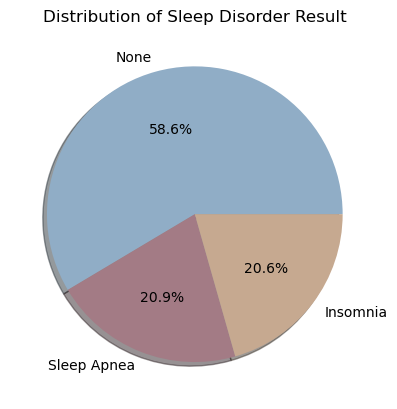

In [9]:
# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df.copy()

# Rename values in the 'Result' column just for the plot
df_copy['Sleep Disorder'] = df_copy['Sleep Disorder'].replace({ 'None':0, 'Sleep Apnea' :1, 'Insomnia':2})
# Rename values in the 'Gender' column
df_copy['Gender'] = df_copy['Gender'].replace({0: 'Male', 1: 'Female'})
# Rename values in the 'BMI Category' column
df_copy['BMI Category'] = df_copy['BMI Category'].replace({'Normal':0,'Obese':1, 'Overweight':2})
# Define custom hex colors
custom_colors = ['#90ADC6', '#a37b85', '#C6A990']
custom_colors_gender = ['#90ADC6', '#C6A990']

# Create a pie chart of the distribution of sleep_disorder result
Sleep_Disorder_counts = df['Sleep Disorder'].value_counts()
plt.pie(Sleep_Disorder_counts, labels=Sleep_Disorder_counts.index, autopct='%1.1f%%', colors=custom_colors, shadow=True)
plt.title('Distribution of Sleep Disorder Result')
plt.show()

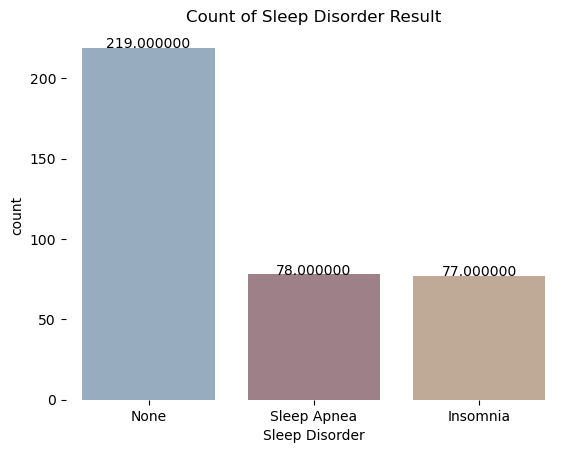

In [10]:
# Create a count plot of the Sleep Disorder result
ax= sns.countplot(x='Sleep Disorder', data=df,  palette=custom_colors)
plt.title('Count of Sleep Disorder Result')

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:f}'.format(p.get_height()), ha='center')
 #{:f} was used because float type variable was used.   
    
    
# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

In [11]:
# Count the number of occurrences of each unique value in the 'Sleep Disorder' column
Sleep_Disorder_counts = df['Sleep Disorder'].value_counts()

# Print the counts of the two categories
print(Sleep_Disorder_counts)

# Check if the two categories are balanced or not
if Sleep_Disorder_counts[0] == Sleep_Disorder_counts[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')
    
print("-----")    
# The classes are heavily skewed we need to solve this issue later.
print('None', round(df['Sleep Disorder'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Sleep Apnea', round(df['Sleep Disorder'].value_counts()[1]/len(df) * 100,2), '% of the dataset') 
print('Insomnia', round(df['Sleep Disorder'].value_counts()[2]/len(df) * 100,2), '% of the dataset') 
    

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64
The two categories are not balanced.
-----
None 58.56 % of the dataset
Sleep Apnea 20.86 % of the dataset
Insomnia 20.59 % of the dataset


# yeta bata hernai baki xa hai gaurav pasa



Here we see the categories are not balanced and we need to address the class imbalance in our data before building a predictive model.

Imbalanced classes can cause issues in machine learning models, as the model may be biased towards the majority class and may not perform well on the minority class.

Most of the class are non-Anemic. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most class are non anemic.

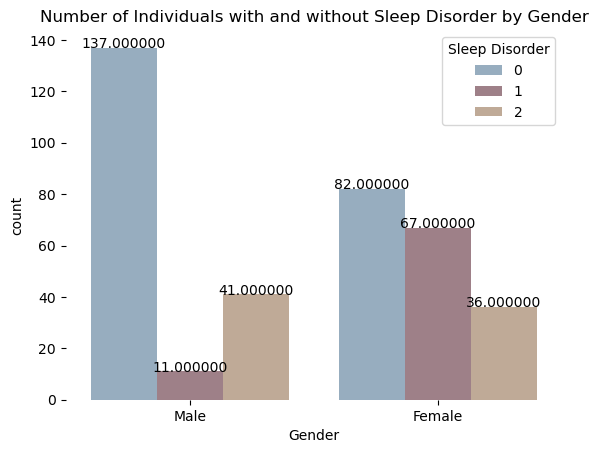

In [12]:
ax= sns.countplot(x='Gender', hue ='Sleep Disorder', data=df_copy, palette=custom_colors)
plt.title('Number of Individuals with and without Sleep Disorder by Gender')



# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:f}'.format(p.get_height()), ha='center')
    
    
# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

- There are 82 Female and 137 Male with no disorder.
- There are 67 Female and 11 Male with sleep apnea.
- There are 36 Female and 41 Male with insomnia.

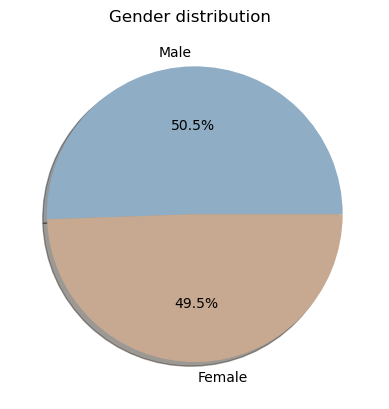

In [13]:
result_counts = df_copy['Gender'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors_gender, shadow=True)
plt.title('Gender distribution  ')
plt.show()

Both male and female participants are consisted almost equally. 

In [14]:
df.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,0,28,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,0,28,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,0,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,0,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [15]:
df_copy.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,6.1,6,42,6,2,126/83,77,4200,0
1,2,Male,28,6.2,6,60,8,0,125/80,75,10000,0
2,3,Male,28,6.2,6,60,8,0,125/80,75,10000,0
3,4,Male,28,5.9,4,30,8,1,140/90,85,3000,1
4,5,Male,28,5.9,4,30,8,1,140/90,85,3000,1


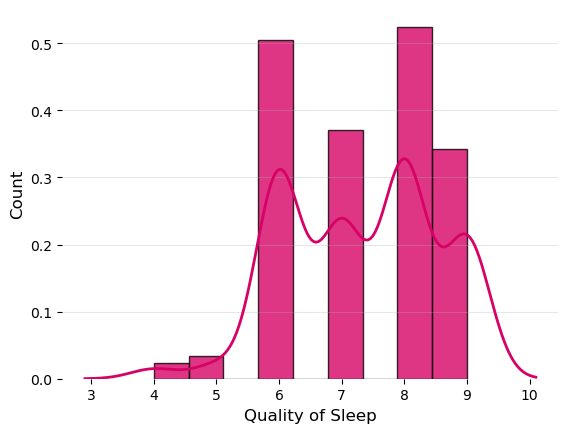

<Figure size 800x600 with 0 Axes>

In [16]:
iqr = np.percentile(df['Quality of Sleep'], 75) - np.percentile(df['Quality of Sleep'], 25)

# Bin width using the Freedman-Diaconis rule 
bin_width = 2 * iqr / (len(df)**(1/3))
                       
                       


sns.distplot(df['Quality of Sleep'], hist=True, kde=True, 
             bins=int(round((df['Quality of Sleep'].max() - df['Quality of Sleep'].min()) / bin_width)),
             color='#d60266',
             hist_kws={'edgecolor':'black', 'alpha': 0.8},
             kde_kws={'linewidth': 2})

# Add labels and adjust font sizes
#plt.title('Distribution of Hemoglobin Levels', fontsize=16, fontweight='bold')
plt.xlabel('Quality of Sleep', fontsize=12)
plt.ylabel('Count', fontsize=12)

# # Add legend
# plt.legend(labels=['Hemoglobin'], loc='upper right')

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)


# Adjust plot size
plt.figure(figsize=(8, 6))
# Show plot
plt.show()

We see the value of Hemoglobin is maximum at 13 and the hemoglobin is left skewed as longer on the left side of its peak.

Left skew: mean < median



In [40]:
df_stat = df_copy.copy()
# Rename values in the 'Gender' column
df_stat['Gender'] = df_stat['Gender'].replace({'Male':0 , 'Female':1 })
df_stat.tail(20)

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
354,355,1,58,8.0,9,75,3,2,140/95,68,7000,1
355,356,1,58,8.0,9,75,3,2,140/95,68,7000,1
356,357,1,58,8.0,9,75,3,2,140/95,68,7000,1
357,358,1,58,8.0,9,75,3,2,140/95,68,7000,1
358,359,1,59,8.0,9,75,3,2,140/95,68,7000,0
359,360,1,59,8.1,9,75,3,2,140/95,68,7000,0
360,361,1,59,8.2,9,75,3,2,140/95,68,7000,1
361,362,1,59,8.2,9,75,3,2,140/95,68,7000,1
362,363,1,59,8.2,9,75,3,2,140/95,68,7000,1
363,364,1,59,8.2,9,75,3,2,140/95,68,7000,1


## Chi square method
Chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. In this case, we are using the chi-square test to determine whether there is a significant association between gender and anemia status.

In [18]:
# Create a contingency table of gender and anemia status
cont_table = pd.crosstab(df_stat['Quality of Sleep'], df_stat['Sleep Disorder'])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(cont_table)

# Print the results
print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Quality of Sleep and Sleep Disorder status are dependent.")
else:
    print("Fail to reject null hypothesis: Quality of Sleep and Sleep Disorder status are independent.")

Chi-Square Statistic: 156.96
P-Value: 0.000
Reject null hypothesis: Quality of Sleep and Sleep Disorder status are dependent.


The chi-square statistic is 156.96 and the p-value is less than 0.000.

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis that Quality of Sleep and Sleep Disorder status are independent, and conclude that there is evidence of a relationship between Quality of Sleep and Sleep Disorder status.

# Feature Selection
With the goal of improving model's performance and interpretability by reducing the number of not important attributes used in the model is termed as feature selection. In supervised methods the feature selecction methoeds are divided into wrapper, filter and intrinsic. The study incorporated correlation, SelectKBest and Extra Tree Classifier.

# Correlation
Pearson correlation matrixis is used.



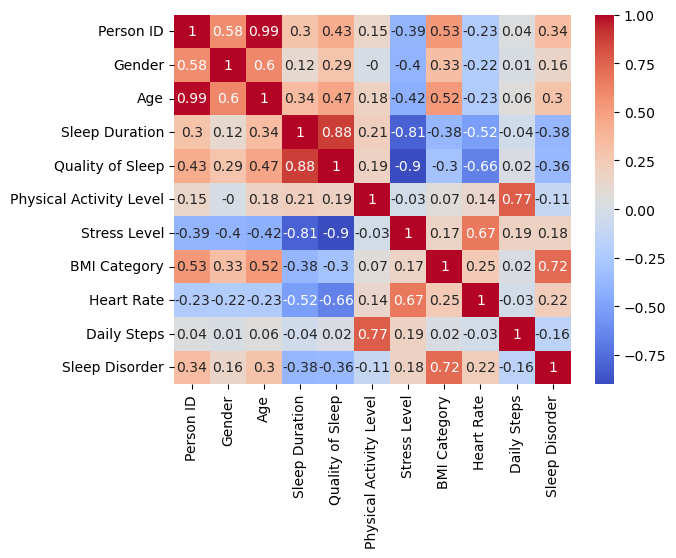

In [19]:
# create a correlation matrix
corr_matrix = df_stat.corr().round(2)

# plot the correlation matrix using a heatmap from seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
#plt.title('Correlation Matrix', fontweight='bold')
plt.show()

The correlation coefficient between gender and hemoglobin is 0.01, indicating a weak positive correlation. This means that there is a slightly higher tendency for one gender to have slightly higher hemoglobin levels than the other, but the correlation is not strong.

The correlation coefficient between result and gender is 0.25, indicating a weak positive correlation. This means that there is a slightly higher tendency for one gender to have slightly higher prevalence of anemia than the other, but the correlation is not strong.

The correlation coefficient between hemoglobin and result is -0.8, indicating a strong negative correlation. This means that as hemoglobin levels decrease, the likelihood of anemia increases. This is an expected result, as anemia is defined by low hemoglobin levels.


# Extremely Randomized Trees.

In [20]:
# Extremely Randomized Trees.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = df_stat.iloc[:,0:5]  # independent columns
y = df_stat.iloc[:,5] 
model.fit(X,y)

ExtraTreesClassifier()

ExtraTreesClassifier()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [21]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.19735573 0.06181214 0.25424684 0.31785136 0.16873393]


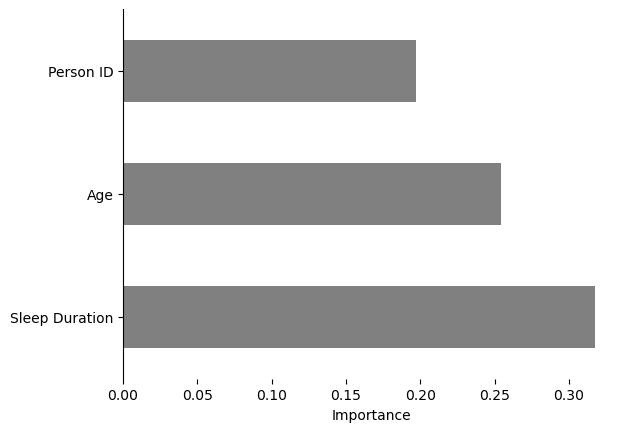

<Figure size 640x480 with 0 Axes>

In [22]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(3).plot(kind='barh', color='#808080')
plt.xlabel('Importance')
# plt.title('Top 3 Features Importance', fontweight='bold', fontsize=12)
# Remove spines
sns.despine(left=False, bottom=True)
plt.show()
plt.savefig('Top2Feature.jpg')

So from Co-relation and Extremely Randomized tree Quality of Sleep,Age,Sleep Duration are important feature. So we will be using these feature for our model.

Now we know these 3 are the best features for the model.

Splitting data into Training and Testing samples
We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [23]:
df_stat.columns

Index(['Person ID', 'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [24]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the selected feature only 
X = df_stat.drop(['Person ID','Gender','Physical Activity Level','Stress Level','Heart Rate' ,'Blood Pressure','Daily Steps','Sleep Disorder'],axis=1)
y = df_stat['Sleep Disorder']
X

,Age,Sleep Duration,Quality of Sleep,BMI Category
0,27,6.1,6,2
1,28,6.2,6,0
2,28,6.2,6,0
3,28,5.9,4,1
4,28,5.9,4,1
...,...,...,...,...
369,59,8.1,9,2
370,59,8.0,9,2
371,59,8.1,9,2
372,59,8.1,9,2


In [25]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [26]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (261, 4)
y_train -  (261,)
X_test -  (113, 4)
y_test -  (113,)


Baseline for models
We will train four types of classifiers and decide which classifier will be more effective in detecting anemic condition.

We will use: Classification ModelsC

- Logistic Regression
- Decision Trees
- Random Forest
- Naive Bayes Classifier
- SVM

# Model Building
We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [28]:
# Predict from Test set

y_pred = logreg.predict(X_test)

In [29]:
# Model Evolution
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        64
           1       0.81      0.78      0.79        27
           2       0.75      0.68      0.71        22

    accuracy                           0.84       113
   macro avg       0.81      0.79      0.80       113
weighted avg       0.84      0.84      0.84       113



In [30]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy: 0.8407079646017699
Precision: 0.8127631075392269
Recall: 0.7938236531986531
F1-score: 0.8025006344176732




Recall (True Positive Rate): % of all Anemic cases captured.

Precision: Out of all items labeled as Anemic, what percentage of them is actually Anemic?

Accuracy: How correct the model is (misleading for Anemic/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

In [31]:
# Predicted values counts for Anemic and Non Anemic of test dataset
pd.Series(y_pred).value_counts()

0    67
1    26
2    20
dtype: int64

Our model predicted 183 cases as Anemic and 244 as non anemic from the test dataset.

In [32]:
# Actual values counts for Anemic and Non Anemic  of test dataset
pd.Series(y_test).value_counts()

0    64
1    27
2    22
Name: Sleep Disorder, dtype: int64

There are originally 181 Anemic cases and our model predicted only 183 fraud transaction.

So the accuracy of our model should be 183/181, right?

In [33]:
26/27

0.9629629629629629

However, this not the case. Actually there are originally 181 Anemic cases and 246 non Anemic cases in the test dataset.

However, our model predicted only 183 Anemic cases. Also, it should be kept in mind that these 183 predicted anemic cases may not be identified correctly. It means that these predicted 181 anemic transactions are NOT only from 183 originally anemic transaction, but they may also be from non anemic cases as well.

So we need to see its accuracy in differnt way.

# Model Evolution Matrix

In [34]:
# confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[59,  2,  3],
       [ 4, 21,  2],
       [ 4,  3, 15]], dtype=int64)

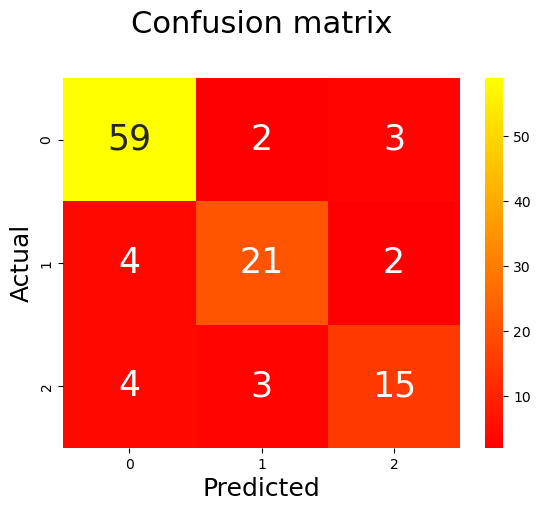

In [35]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

There are 181 cases recognised as True Postive, means they are orignally anemic cases and our model precited them as anemic cases only.

True Negative - 244 (truely saying negative - non anemic cases correctly identified as non anemic)

True Postive - 181 (truely saying positive - anemic cases correctly identified as anemic)

False Negative - 0 ( falsely saying negative - anemic transaction incorrectly identified as non anemic)

False Positive - 0 ( falsely saying positive - non anemic transaction incorrectly identified as anemic)

We already know that we have 181 anemic cases in our test dataset, but our model predicted only 181 anemic casess. So the real accuracy of our model is 181/181

In [36]:
21/27

0.7777777777777778

So, 100% is` the real accuracy of our model, which is nothing but the Recall Score (here we have same accuracy and recall). So we have the emphasis on Recall score and F1 score to measure the performance of our model, not the accuracy.

In [37]:
from sklearn.tree import export_graphviz
import graphviz

#hyperparametered DT
dt_tuning = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the decision tree based on selected parameter
dt_tuning.fit(X_train, y_train)
# Generate a DOT file representing the decision tree
dot_data = export_graphviz(dt_tuning, out_file=None, feature_names=X_train.columns, class_names=['Non Anemic', 'Anemic'], filled=True, rounded=True)

# Visualize the decision path for the new data point
graph = graphviz.Source(dot_data)
graph.render('decision_tree')  # save the decision tree as a PDF file
graph

ModuleNotFoundError: No module named 'graphviz'